# A. tketを使った量子回路の作成　基礎編

## 1. 量子ビットの準備する

### 1-1. Circuitで量子ビット数、ビット数を指定する。$|0\rangle^{\otimes n}$が初期値
量子ビットを準備
- `Circuit('number of qubits')` 

量子ビット、ビットを準備
- `Circuit('number of qubits','number of bits')` 

量子回路を出力
- `render_circuit_jupyter(Circuit)`

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter #量子回路モデルの表示
trivial_circ = Circuit()        # no qubits or bits
quantum_circ = Circuit(2)       # 4 qubits and no bits
mixed_circ   = Circuit(2, 1)    # 4 qubits and 2 bits
render_circuit_jupyter(trivial_circ)
render_circuit_jupyter(quantum_circ)
render_circuit_jupyter(mixed_circ)

### 1-2. add_q_registerで量子ビット、add_c_registerでビットを挿入する
量子ビットを加える
- `Circuit.add_q_register('name','number of qubits')`

ビットを加える
- `Circuit.add_c_register('name','number of bits')`

量子ビットのリストを出力
- `Circuit.qubits`

ビットのリストを出力
- `Circuit.bits`

In [2]:
circ = Circuit()        # no qubits or bits
circ.add_q_register('qb1',2)       # add 2 qubits
circ.add_q_register('qb2',1)       # add 1 qubit
circ.add_c_register('cb',2)        # add 2 bits
print(circ.qubits)                 #qubit registerの確認
print(circ.bits)                   #bit registerの確認
render_circuit_jupyter(circ)

[qb1[0], qb1[1], qb2[0]]
[cb[0], cb[1]]


## 2. 準備した量子ビットに量子ゲートを作用させる

### 2-1. 基本的な量子ゲートの作用
準備した量子ビットに量子ゲートを作用させる

(制御、回転角の指定)=(無,無) 
- `Circuit.'gate_name'('terget qubit(s)')`

(制御、回転角の指定)=(有,無) 
- `Circuit.'gate_name'('control_qubit(s)','terget qubit(s)')`

(制御、回転角の指定)=(無,有) 
- `Circuit.'gate_name'('angle','terget qubit(s)')`

(制御、回転角の指定)=(有,有) 
- `Circuit.'gate_name'('angle','control_qubit(s)','terget qubit(s)')`

In [4]:
from pytket import Circuit
circ = Circuit(3)
circ.X(1)
circ.SWAP(1,2)
circ.CH(0,2)
circ.Rx(0.5,1)
circ.CCX(0,2,1)
circ.CRy(0.25,0,2)
render_circuit_jupyter(circ)

### 2-2. その他の量子ゲート
参照：https://cqcl.github.io/tket/pytket/api/circuit_class.html#

|  量子ゲート |  階数  | 概要   |  量子ゲート |  階数  | 概要 |  量子ゲート |  階数  | 概要   |
| :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
|  **X(qubit)**  | 1 |  \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}  |  **Y(qubit)** | 1 |  \begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}  |  **Z(qubit)** | 1 |  \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}  |
|  **CX(c_qubit,t_qubit)**  | 2 |  Controlled X  |  **CY(c_qubit,t_qubit)**  | 2 |  Controlled Y  |  **CZ(c_qubit,t_qubit)**  | 2 |  Controlled Z  |
|  **Rx(angle,qubit)**  | 1 |  $e^{-\frac{1}{2}i\pi\alpha X}=$$\begin{pmatrix} \cos \frac{\alpha\pi}{2} & -i \sin \frac{\alpha\pi}{2} \\ -i \sin \frac{\alpha\pi}{2} & \cos \frac{\alpha\pi}{2} \end{pmatrix}$  |  **Ry(angle,qubit)**  | 1 |  $e^{-\frac{1}{2}i\pi\alpha Y}=$$\begin{pmatrix} \cos \frac{\alpha\pi}{2} & -\sin \frac{\alpha\pi}{2} \\ \sin \frac{\alpha\pi}{2} & \cos \frac{\alpha\pi}{2} \end{pmatrix}$  |  **Rz(angle,qubit)**  | 1 |  $e^{-\frac{1}{2}i\pi\alpha Z}=$$\begin{pmatrix} e^{-\frac{i\alpha\pi}{2}} & 0 \\ 0 & e^{\frac{i\alpha\pi}{2}} \end{pmatrix}$  |
|  **CRx(angle,c_qubit,t_qubit)**  | 2 |  Controlled Rx  |  **CRy(angle,c_qubit,t_qubit)**  | 2 |  Controlled Ry  |  **CRz(angle,c_qubit,t_qubit)**  | 2 |  Controlled Rz  |
|  **XXPhase(angle,qubit0,qubit1)**  | 2 |  \begin{pmatrix} \cos \frac{\alpha\pi}{2} &0&0& -i \sin \frac{\alpha\pi}{2} \\ 0 & \cos \frac{\alpha\pi}{2}&-i \sin \frac{\alpha\pi}{2}&0\\ 0 & -i \sin \frac{\alpha\pi}{2}&\cos \frac{\alpha\pi}{2}&0\\ -i \sin \frac{\alpha\pi}{2}&0&0&\cos \frac{\alpha\pi}{2}\end{pmatrix}  |  **YYPhase(angle,qubit0,qubit1)**  | 2 |  \begin{pmatrix} \cos \frac{\alpha\pi}{2} &0&0& i \sin \frac{\alpha\pi}{2} \\ 0 & \cos \frac{\alpha\pi}{2}&-i \sin \frac{\alpha\pi}{2}&0\\ 0 & -i \sin \frac{\alpha\pi}{2}&\cos \frac{\alpha\pi}{2}&0\\ i \sin \frac{\alpha\pi}{2}&0&0&\cos \frac{\alpha\pi}{2}\end{pmatrix}   |  **ZZPhase(angle,qubit0,qubit1)**  | 2 |  \begin{pmatrix} e^{-\frac{i\alpha\pi}{2}} & 0 & 0 & 0 \\ 0 & e^{\frac{i\alpha\pi}{2}} & 0 & 0 \\ 0 & 0 & e^{\frac{i\alpha\pi}{2}} & 0 \\ 0 & 0 & 0 & e^{-\frac{i\alpha\pi}{2}} \end{pmatrix}   |


|  量子ゲート |  階数  | 概要 |  量子ゲート |  階数  | 概要 | 
| :----: | :----: | :----: | :----: | :----: | :----: | 
|  **H(qubit)**  | 1 | $\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ | **SWAP(qubit0,qubit1)** | 2 |  SWAP ゲート  |
|  **CH(c_qubit,t_qubit)**   | 2 |  Controlled H  | **CSWAP(c_qubit,t_qubit0,t_qubit1)**  | 3 |Controlled SWAP|
| **CCX(c_qubit0,c_qubit1,t_qubit)**  | 3 |  トフォリ ゲート   | | | |

|  量子ゲート |  階数  | 概要 |  量子ゲート |  階数  | 概要 | 
| :----: | :----: | :----: | :----: | :----: | :----: |
|  **S(qubit)**  | 1 |  \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}  |  **T(qubit)**  | 1 |  \begin{pmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{pmatrix}  |
|  **Sdg(qubit)**  | 1 |  \begin{pmatrix} 1 & 0 \\ 0 & -i \end{pmatrix}  |  **Tdg(qubit)**  | 1 |  \begin{pmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{pmatrix}  |
|  **SX(qubit)**  | 1 |  $\frac{1}{2}\begin{pmatrix} 1+i & 1-i \\ 1-i & 1+i \end{pmatrix} $ |  **V(qubit)**  | 1 |   $\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & -i \\ -i & 1 \end{pmatrix} $ |
|  **SXdg(qubit)**  | 1 |   $\frac{1}{2}\begin{pmatrix} 1-i & 1+i \\ 1+i & 1-i \end{pmatrix}$   |  **Vdg(qubit)**  | 1 |  $\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & i \\ i & 1 \end{pmatrix} $ |
|  **CSX(c_qubit,t_qubit)**  | 2 |  Controlled SX  |  **CV(c_qubit,t_qubit)**  | 2 |  Controlled V  |
|  **CSXdg(c_qubit,t_qubit)**  | 2 |  Controlled SXdg  |  **CVdg(c_qubit,t_qubit)**  | 2 |  Controlled Vdg  |

### 2-3. add_gateを使った量子ゲートの作用
2-2.で挙げたゲート以外にも様々な量子ゲートが用意されている
- `Circuit.add_gate(OpType.'gate_name',['angle(s)'],['qubit(s)'])` 

として利用

|  量子ゲート |  階数  |  パラメータ  | 概要 |  量子ゲート |  階数  |  パラメータ  | 概要 | 
| :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
|  **U1**  | 1 | $\lambda$ | $e^{\frac{i\pi\lambda}{2}}$$Rz(\lambda)$ | **U2** | 1 | $(\phi,\lambda)$ | $e^{\frac{i\pi(\lambda+\phi)}{2}}$$Rz(\phi)$$Ry(\frac{1}{2})$$Rz(\lambda)$  |
|  **U3** | 1 | $(\theta,\phi,\lambda)$ | $e^{\frac{i\pi(\lambda+\phi)}{2}}$$Rz(\phi)$$Ry(\theta)$$Rz(\lambda)$ |  |  |  |  |
|  **CU1**  | 2 | $\lambda$ | controlled U1$(\lambda)$ |  **CU3** | 2 | $(\theta,\phi,\lambda)$ | controlled U3$(\theta,\phi,\lambda)$ |
|  **CnX**  | n+1 |  | n-controlled X | **CnRy** | n+1 | $\alpha$ | n-controlled $Ry(\alpha)$ |  |  |  |  |
|  **TK1**  | 1 | $(\alpha,\beta,\gamma)$ | $Rz(\alpha)$$Rx(\beta)$$Rz(\gamma)$ | **TK2** | 2 | $(\alpha,\beta,\gamma)$ | XXPhase($\alpha$)YYPhase($\beta$)ZZphase($\gamma$) |
|  **Unitary1qBox**  | 1 | $2\times 2$ | $2\times 2$ユニタリー行列 | **Unitary2qBox** | 2 | $4\times 4$ | $4\times 4$ユニタリー行列 |
|**Unitary3qBox** | 3 | $8\times 8$ | $8\times 8$ユニタリー行列 |

参照：https://cqcl.github.io/tket/pytket/api/optype.html


In [22]:
from pytket import Circuit, OpType
# add_gate(OpType.'gate_name',['angle(s)'],['qubit(s)'])
circ = Circuit(3)
circ.add_gate(OpType.X,[0]) 
circ.add_gate(OpType.SWAP,[1,2])
circ.add_gate(OpType.CH,[0,2])
circ.add_gate(OpType.Rx,[0.5],[1])
circ.add_gate(OpType.CCX,[0,2,1])
circ.add_gate(OpType.CRy,[0.25],[0,2])
render_circuit_jupyter(circ)

In [9]:
from pytket import Circuit, OpType
# add_gate(OpType.'gate_name',['angle(s)'],['qubit(s)'])
circ = Circuit(4)
circ.add_gate(OpType.U1,[0.75],[0]) 
circ.add_gate(OpType.U2,[0.75,0.25],[1])
circ.add_gate(OpType.U3,[0.5,0.5,0.5],[2])
circ.add_gate(OpType.CU1,[0.5],[0,2])
circ.add_gate(OpType.CU3,[0.5,0.75,0.25],[1,2])
circ.add_gate(OpType.CnRy,[0.5],[0])
circ.add_gate(OpType.CnRy,[0.5],[1,0])
circ.add_gate(OpType.CnRy,[0.5],[1,2,0])
circ.add_gate(OpType.CnRy,[0.5],[1,2,3,0])
circ.add_gate(OpType.CnX,[3])
circ.add_gate(OpType.CnX,[2,3])
circ.add_gate(OpType.CnX,[1,2,3])
circ.add_gate(OpType.CnX,[0,1,2,3])
render_circuit_jupyter(circ)

## 3. 測定
### tketでは、すべての測定はZ基底$\{|0\rangle,|1\rangle\}$で行われる。

- `Circuit.Measure('qubit','bit')`

として利用

- Z基底以外での測定をしたい場合には、測定の直前でZ基底を基底変換する

In [23]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter
circ = Circuit(2, 2)
circ.Measure(0, 0)  #  measurement on qubit 0, saving result in bit 0
circ.add_barrier([0,1])
circ.H(1) # change of basis
circ.Measure(1, 1)  # X-basis measurement on qubit 1, saving result in bit 1
render_circuit_jupyter(circ)

測定結果を上書きすることが可能

In [24]:
from pytket import Circuit
circ = Circuit(2, 1)
circ.Measure(0, 0)  # measurement on qubit 0
circ.Measure(1, 0)  # overwrites the first result with the measurement on qubit 1
render_circuit_jupyter(circ)

すべての量子ビットを測定する
- `Circuit.measure_all()`

量子ビット数に対してビット数が少ない場合にはビットを補完する

In [25]:
from pytket import Circuit
# measure qubit 0 in Z basis and 1 in X basis
circ = Circuit(2, 2)
circ.measure_all()
render_circuit_jupyter(circ)

circ = Circuit(2, 1)
circ.measure_all()
render_circuit_jupyter(circ)

# measure_all() adds bits if they are not already defined, so equivalently
circ = Circuit(2)
circ.measure_all()
render_circuit_jupyter(circ)

レジスターを指定して量子ビットを測定する
- `Circuit.measure_register('QubitRegister','name of BitRegister to be created')`

QubitRegisterのリストは以下で取得可能
- `Circuit.q_registers`

In [26]:
circ = Circuit()        # no qubits or bits
circ.add_q_register('qb1',2)       # add 2 qubits
circ.add_q_register('qb2',1)       # add 1 qubit
render_circuit_jupyter(circ)

In [27]:
circ.q_registers

[QubitRegister("qb1", 2), QubitRegister("qb2", 1)]

QubitRegister("qb1", 2)を測定する

In [28]:
circ = Circuit()        # no qubits or bits
circ.add_q_register('qb1',2)       # add 2 qubits
circ.add_q_register('qb2',1)       # add 1 qubit
circ.measure_register(circ.q_registers[0],'cb')
render_circuit_jupyter(circ)

## ※ここまでの知識を使って量子回路を作成し、シミュレータにJobを投げてみる

### 重ね合わせ状態を作成
$$ |\Psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$$

In [29]:
from pytket import Circuit, OpType
circ = Circuit(1, 1)
circ.H(0)
circ.Measure(0, 0)
render_circuit_jupyter(circ)

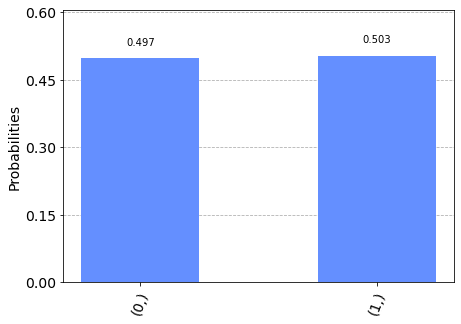

In [30]:
from pytket.extensions.qiskit import AerBackend
from qiskit.visualization import plot_histogram
backend = AerBackend()
handle = backend.process_circuit(circ, n_shots =10000)
result_counts = backend.get_result(handle).get_counts()
plot_histogram(result_counts)

In [32]:
from pytket import Circuit, OpType
circ = Circuit(2, 1)
circ.H(0)
circ.Measure(0, 0)
# Actively reset state to |0>
circ.add_gate(OpType.Reset, [0])
# Conditionally flip state to |1> to reflect measurement result
circ.X(0, condition_bits=[0], condition_value=1)
# Use the qubit as if the measurement was non-destructive
circ.CX(0, 1)
circ.Measure(1,0)
render_circuit_jupyter(circ)

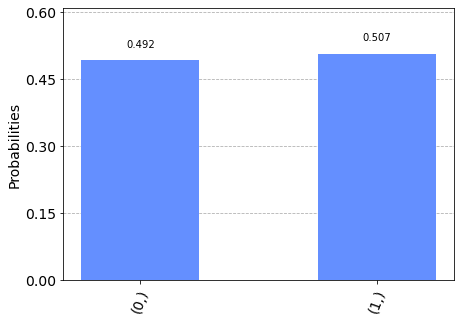

In [33]:
from pytket.extensions.qiskit import AerBackend
from qiskit.visualization import plot_histogram
backend = AerBackend()
handle = backend.process_circuit(circ, n_shots =10000)
result_counts = backend.get_result(handle).get_counts()
plot_histogram(result_counts)

## 5. バリア (オプション)
バリアは命令として存在しますが、能動的な操作は行いません。その代わり、その機能は2つあります。
- 実行時には、バリアより前の操作がバリアより後の操作の開始前に終了していることを保証する。
- コンパイル時に、コンパイラがバリアの周囲で操作を並べ替えるのを防ぐ。

バリアの挿入
- `Circuit.add_barrier(['qubit(s)'],['bit(s)'])`

※バリアの除去は`pytket.passes`に組み込まれている
- `RemoveBarriers().apply(Circuit)`

In [192]:
from pytket import Circuit
circ = Circuit(3, 2)
circ.CX(1, 2)
circ.Measure(0, 0)
circ.Measure(2, 1)
render_circuit_jupyter(circ)

In [193]:
from pytket import Circuit
circ = Circuit(3, 2)
circ.CX(1, 2)
circ.add_barrier([0, 1, 2], [0, 1]) # add a barrier on all qubits and bits
circ.Measure(0, 0)
circ.Measure(2, 1)
render_circuit_jupyter(circ)

In [194]:
from pytket.passes import RemoveBarriers
RemoveBarriers().apply(circ)
render_circuit_jupyter(circ)

# B. tketを使った量子回路の作成　応用編

## 5. 量子回路のボックス化
任意の回路を実装するためには、個々の基本ゲートで作業すれば十分ですが、それが最も便利な方法であるとは限りません。
一般に、より高度な構造を使って構築した方がはるかに簡単です。
pytketでは、複雑な構造を抽象化するために、「ボックス」という概念を用いています。

CircBoxでは、Circuitを1つのsubcircuitとして定義し、あたかも1つのゲートであるかのように見せることができます。

- `CircBox(Circuit)`

としてボックス化することが可能

- `Circuit.add_circbox('box name',['qubit(s)'])`

としてボックスを作用させる

In [37]:
from pytket.circuit import Circuit, CircBox
sub = Circuit(2)
sub.CX(0, 1).Rz(0.2, 1).CX(0, 1)
render_circuit_jupyter(sub)
sub_box = CircBox(sub)

circ = Circuit(3)
circ.add_circbox(sub_box, [0, 1])
circ.X(1)
circ.add_circbox(sub_box, [2, 1])
circ.add_circbox(sub_box, [0, 2])
render_circuit_jupyter(circ)

## 6. 制御量子ゲートのカスタマイズ
制御量子ビットの状態によって、量子ゲートやサブサーキットをターゲットとなる量子ビットに適用する/しない機能をもった制御量子ゲートをカスタマイズすることができる。
- `QControlBox('gate or CircBox','number of c_qubits')`

量子ゲートは次の操作でカプセル化をする必要がある

回転角の指定: 無 
- Op.create(OpType.'gate_name')

回転角の指定: 有
- Op.create(OpType.'gate_name','angle')

In [39]:
from pytket.circuit import Op, OpType, QControlBox
ops = Op.create(OpType.S)
opRx = Op.create(OpType.Rx,0.25)

ccs = QControlBox(ops, 2)
ccRx = QControlBox(opRx, 3)
cbox = QControlBox(sub_box, 1)

circ = Circuit(4)
circ.add_qcontrolbox(ccs, [0,2,1])
circ.add_qcontrolbox(ccRx, [0,2,3,1])
circ.add_qcontrolbox(cbox, [0,2,3])
render_circuit_jupyter(circ)

## 7. 状態の確認とユニタリー行列の確認
作成した量子回路が与える量子状態を確認することができます。
量子回路の構成が正しいかどうかをチェックするのに役立ちます。

量子回路が適用された後のシステムの状態ベクトルを生成。すべての量子ビットが初期化された状態であると仮定しています。
- `Circuit.get_statevector()`

量子回路で適用されるユニタリー行列を数値的に計算
- `Circuit.get_unitary()`

In [40]:
from pytket import Circuit
circ=Circuit(2)
circ.H(0).CX(0,1)
circ.get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [41]:
from pytket import Circuit
circ=Circuit(2)
circ.H(0).CZ(0,1).H(1)
circ.get_unitary()

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j]])

## 8. 量子回路の解析

量子回路の複雑さを測る定量的なものとしてゲート数、深さがある。

ゲート数：量子回路に含まれるゲート数

深さ：並列に実行可能なゲートを1グループとしたときのグループ数

量子回路のゲート数、深さは次で出力できる
- `Circuit.n_gates`
- `Circuit.depth()`

特定の量子ゲート(複数可)に着目して、ゲート数、深さを算出することも可能
- `Circuit.n_gates_of_type(OpType.'gate_name')`
- `Circuit.depth_by_type(OpType.'gate_name')`


In [42]:
from pytket import Circuit
circ = Circuit(3)
circ.CX(0, 1).CZ(1, 2).X(1).Rx(0.3, 0)

print('Gete number: ', circ.n_gates)
print('Circuit depth: ', circ.depth())
render_circuit_jupyter(circ)

Gete number:  4
Circuit depth:  3


In [43]:
from pytket import Circuit, OpType
circ = Circuit(4)
circ.T(0)
circ.CX(0, 1)
circ.CX(2, 3)
circ.T(3)
circ.CZ(0, 2)
circ.CZ(1, 3)
circ.T(1)

print('T number: ', circ.n_gates_of_type(OpType.T))
print('CX number: ', circ.n_gates_of_type(OpType.CX))
print('CZ number: ', circ.n_gates_of_type(OpType.CZ))
print('CX number + CZ number: ', circ.n_gates_of_type(OpType.CX) + circ.n_gates_of_type(OpType.CZ))
print('T depth: ', circ.depth_by_type(OpType.T))
print('CX & CZ depth: ', circ.depth_by_type({OpType.CX, OpType.CZ}))
render_circuit_jupyter(circ)

T number:  3
CX number:  2
CZ number:  2
CX number + CZ number:  4
T depth:  2
CX & CZ depth:  2


## 9. パラメータ付き量子ゲート
似たような構造を持ちながらゲートパラメータを変化させた回路を多数使用する実験が非常に一般的である。
VQEやQAOAのような変分アルゴリズムでは、回路パラメータを代数記号として扱い、エネルギーランドスケープを探索しています。

- `sympy`の`Symbol`, `symbols`を利用して、量子ゲートのパラメータを代数記号として扱うことができます
- `Circuit.symbol_substitution('set of parameter values')`として値の代入可能

In [52]:
from pytket import Circuit, OpType
from sympy import symbols, Symbol
a = Symbol("a")
b, c = symbols("b c")
circ = Circuit(2)
circ.Rx(a, 0)
circ.Rx(c, 1)
circ.CX(0, 1)
circ.add_gate(OpType.YYPhase, b, [0, 1])
render_circuit_jupyter(circ)

代入操作
- `symbol_substitution`

を利用

In [53]:
s_map = {a: 0.3, b:1.25}
circ.symbol_substitution(s_map)
render_circuit_jupyter(circ)

変数に変数を代入することも可能

In [56]:
from pytket import Circuit
from sympy import symbols
a, b, c = symbols("a b c")
circ = Circuit(2)
circ.Rx(a, 0).Rx(c, 1).CX(0, 1).add_gate(OpType.YYPhase, b, [0, 1])
render_circuit_jupyter(circ)

s_map = {a: 2*a, c: a}  # replacement happens simultaneously, and not recursively
circ.symbol_substitution(s_map)
print(circ.get_commands())
render_circuit_jupyter(circ)

[Rx(2*a) q[0];, Rx(a) q[1];, CX q[0], q[1];, YYPhase(b) q[0], q[1];]


作成したパラメータ付き量子回路が与える量子状態やユニタリー行列を確認することができます。
- `circuit_to_symbolic_unitary(Circuit)`
- `circuit_apply_symbolic_statevector(Circuit)`


In [59]:
from pytket import Circuit
from pytket.utils.symbolic import circuit_apply_symbolic_statevector, circuit_to_symbolic_unitary
from sympy import Symbol
a = Symbol("a")
circ = Circuit(2)
circ.Rx(a, 0).CX(0, 1)
render_circuit_jupyter(circ)
display(circuit_apply_symbolic_statevector(circ))
circuit_to_symbolic_unitary(circ)

Matrix([
[   cos(pi*a/2)],
[             0],
[             0],
[-I*sin(pi*a/2)]])

Matrix([
[   cos(pi*a/2),              0, -I*sin(pi*a/2),              0],
[             0,    cos(pi*a/2),              0, -I*sin(pi*a/2)],
[             0, -I*sin(pi*a/2),              0,    cos(pi*a/2)],
[-I*sin(pi*a/2),              0,    cos(pi*a/2),              0]])

## 10. 量子回路レベルのオペレーション
随伴の作用
- `Circuit.dagger()`

circuitのクラスターをcircuitに作用
- `Circuit1.append(Circuit2)`


In [61]:
from pytket import Circuit
# we want a circuit for E = exp(-i pi (0.3 XX + 0.1 YY))
circ = Circuit(2)

# find C such that C; Rx(a, 0); C^dagger performs exp(-i a pi XX/2)
# and C; Rz(b, 1); C^dagger performs exp(-i b pi YY/2)
conj = Circuit(2)
conj.V(0).V(1).CV(0, 1)
render_circuit_jupyter(conj)
conj_dag = conj.dagger()
render_circuit_jupyter(conj_dag)

circ.append(conj)
circ.Rx(0.6, 0).Rz(0.2, 1)
circ.append(conj_dag)
render_circuit_jupyter(circ)
